# Homework 1

### Deadline: Monday 24 March 2024 (by 19h00)

### Credits: 20 points

### Instructions:

- When you finish, please submit a single **.ipynb** file via email to wbanda@yachaytech.edu.ec


- The homework is **individual**. Please include your name in the notebook.


- Within a **single python notebook**, solve the following problems.

# Name: 

## 1. Population dynamics (8 points)

The system of ordinary differential equations (ODEs) describing the population dynamics of two prey species ($x$ and $y$) and one predator species ($z$) is given by:


\begin{aligned}
\frac{dx}{dt} &= g_1\,x \left( 1 - \frac{x}{c_1} \right) - p_1\,x\,z, \\
\frac{dy}{dt} &= g_2\,y \left( 1 - \frac{y}{c_2} \right) - p_2\,y\,z, \\
\frac{dz}{dt} &= e_1\,p_1\,x\,z + e_2\,p_2\,y\,z - d\,z.
\end{aligned}


where:

- $g_1$, $g_2$ are the intrinsic growth rates (e.g. birth rates) of the prey populations,

- $c_1$, $c_2$ are the carrying capacities of the prey populations (the carrying capacity of an environment is the maximum population size of a biological species that can be sustained by that specific environment), 
  
- $p_1$, $p_2$ are the predation rates of the predator on each prey (e.g. how successful a hunt is),

- $e_1$, $e_2$ are the conversion efficiencies of consumed prey into predator biomass (the conversion efficiency tells us how efficiently a predator can use the energy from its prey to reproduce),

- $d$ is the natural death rate of the predator. Note that the death rates of the two prey species are intrinsically given by their individual carrying capacities.

This system models the interactions where both prey species grow logistically but are consumed by a common predator.

### State vector and slope:

**(a)** Write down this system of ODEs in terms of the system state vector $S(t)$, i.e. $\frac{dS}{dt} = F(S)$. Identify the slope function $F(S)$ and indicate whether or not it can be explicitly written as a function of $S$. Create a python function for the slope $F(S)$.

### ODE integration methods:

**(b)** Create a python function that implements a trapezoidal Euler method for ODE integration.

**(c)** Design your own third-order RK method (RK3), and create a python function for this integrator.

**(d)** Write a python function for the **Butcher's Runge-Kutta method**, which is a popular method for integrating ODEs with a high order of accuracy. It is obtained by following a similar approach to the one we discussed in class. This method uses six points $k_1, k_2, k_3$, $k_4$, $k_5$, and $k_6$. A weighted average of these points is used to produce the approximation of the solution. The algorithm relies on computing the following slopes:

$$
\begin{aligned}
k_1  =  F(t_j,S(t_j))\\
k_2  =  F\left(t_j+\frac{h}{4},S(t_j)+\frac{1}{4}k_1h\right)\\
k_3  =  F\left(t_j+\frac{h}{4},S(t_j)+\frac{1}{8}k_1h+\frac{1}{8}k_2h\right)\\
k_4  =  F\left(t_j+\frac{h}{2},S(t_j)-\frac{1}{2}k_2h+k_3h\right)\\
k_5  =  F\left(t_j+\frac{3h}{4},S(t_j)+\frac{3}{16}k_1h+\frac{9}{16}k_4h\right)\\
k_6  =  F\left(t_j+h,S(t_j)-\frac{3}{7}k_1h+\frac{2}{7}k_2h+\frac{12}{7}k_3h-\frac{12}{7}k_4h+\frac{8}{7}k_5h\right)
\end{aligned}
$$

The solution is then constructed with the step size ($h$, same as `dt`)as follows:

$$
S(t_{j+1}) = S(t_j) + \frac{h}{90}\left(7k_1 + 32k_3 + 12k_4 + 32k_5+7k_6\right).
$$

### Settings and initial conditions:

**(e)** Create a dictionary that allocates all the user-defined initial conditions needed for integration, including an option for the user to select the integration method. The default parameters in the dictionary should be:

| Parameter | Value | Description |
|---|---|---|
| `g1` | 1.0 | Growth rate of prey 1 |
| `c1` | 200.0 | Carrying capacity of prey 1 |
| `p1` | 0.01 | Predation rate of predator on prey 1 |
| `g2` | 1.2 | Growth rate of prey 2 |
| `c2` | 150.0 | Carrying capacity of prey 2 |
| `p2` | 0.008 | Predation rate of predator on prey 2 |
| `e1` | 0.08 | Conversion efficiency of prey 1 to predator |
| `e2` | 0.07 | Conversion efficiency of prey 2 to predator |
| `d` | 0.15 | Death rate of predator |
| `x0` | 100.0 | Initial population of prey 1 |
| `y0` | 80.0 | Initial population of prey 2 |
| `z0` | 20.0 | Initial population of predator |
| `t_span` | (0, 200) | Time span for simulation |
| `dt` | 0.01 | Time step size ($=h$) |
| `method` | RK3 | Integration method |

### Time stepping:

**(f)** Create a python function that integrates the system of ODEs using the settings and initial conditions as arguments. The function should perform integration for all three methods (according to the option `method`) and return the resulting times ($t$) and system states $S(t)$ as arrays.

### Plotting function:

**(g)** Create a python function that takes the times ($t$) and system states $S(t)$ as arguments and returns a 3-panel figure showing the evolution of each species ($x$, $y$, and $z$) in the system as a function of time, $t$.

### Simulation:

**(h)** Call your time-stepping and plotting functions to run and display the results of three simulations (one per integration method), using the default settings and initial conditions from the table in (e). Based on your simulations, does the system reach equilibrium?


# SOLUTIONS


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

### State vector and slope:

**(a)** Write down this system of ODEs in terms of the system state vector $S(t)$, i.e. $\frac{dS}{dt} = F(S)$. Identify the slope function $F(S)$ and indicate whether or not it can be explicitly written as a function of $S$. Create a python function for the slope $F(S)$.

$$ 
F(t_j,S(t_j))= 
\left[\begin{array}{ccc}
g_{1}(1-\frac{x}{c_1}) & 0 & -p_1x \\
0 & g_2(1-\frac{y}{c_2}) &-p_2y\\
e1p1z & e2p2z &-d 
\end{array}\right]S(t)
$$

### ODE integration methods:

**(b)** Create a python function that implements a trapezoidal Euler method for ODE integration.

$$
\left[\begin{array}{ccc}
-\frac{h}{2} g_{1}(1-\frac{x}{c_1}) +1 & 0 & +\frac{h}{2} p_1x \\
0 & -\frac{h}{2} g_2(1-\frac{y}{c_2}) +1 &  \frac{h}{2}p_2y\\
-\frac{h}{2}e1p1z & -\frac{h}{2}e2p2z & \frac{h}{2} d +1  
\end{array}\right] S(t_{j+1}) = \left[\begin{array}{ccc}
g_{1}(1-\frac{x}{c_1}) & 0 & -p_1x \\
0 & g_2(1-\frac{y}{c_2}) &-p_2y\\
e1p1z & e2p2z &-d 
\end{array}\right] S(t_{j})
$$

$$
S(t_{j+1}) = \left[\begin{array}{ccc}
-\frac{h}{2} g_{1}(1-\frac{x}{c_1}) +1 & 0 & +\frac{h}{2} p_1x \\
0 & -\frac{h}{2} g_2(1-\frac{y}{c_2}) +1 &  \frac{h}{2}p_2y\\
-\frac{h}{2}e1p1z & -\frac{h}{2}e2p2z & \frac{h}{2} d +1  
\end{array}\right]^{-1}  \left[\begin{array}{ccc}
\frac{h}{2} g_{1}(1-\frac{x}{c_1}) +1 & 0 & -\frac{h}{2}p_1x \\
0 & \frac{h}{2} g_2(1-\frac{y}{c_2}) + 1 &-\frac{h}{2}p_2y\\
\frac{h}{2}e1p1z & \frac{h}{2}e2p2z & -d \frac{h}{2} +1
\end{array}\right] S(t_{j})
$$

In [7]:
#define parameters
g1=1.0
c1=200.0
p1=0.01
g2=1.2
c2=150.0
p2=0.008
e1=0.08
e2=0.07
d=0.15
x0=100
y0=80.0
z0=20.0
t_span=(0,200)
dt=0.01

#parameters={g1=1.0,c1=200.0,p1=0.01,g2=1.2,c2=150.0,p2=0.008,e1=0.08,e2=0.07,d=0.15,x0=100,y0=80.0,z0=20.0,t_span=(0,200),dt=0.01}

In [8]:

# define the matrix (slope funciton)
def trapz_method(g1,c1,p1,g2,c2,p2,e1,e2,d,S0,h,t):
#def trapz_method(t,S0,parameters,h):
    # extract the parameters


    S = np.zeros((len(t), 3), dtype=float)
    # Set initial condition
    S[0] = S0
    
    # integration
    for j in range(0,len(t)-1):
      x,y,z=S[j]
      m_left=np.array([[-h/2 * g1*(1-x/c1)+1, 0 , h/2 * p1 * x],[0, -h/2 * g2 * (1-y/c2)+1, h/2 * p2 *y], [-h/2 * e1 * p1 * z, -h/2 * e2 * p2 * z ,h/2*d +1]])
      m_right=np.array([[h/2 * g1*(1-x/c1)+1, 0 , -h/2 * p1 * x],[0, h/2 * g2 * (1-y/c2)+1, -h/2 * p2 *y], [h/2 * e1 * p1 * z, h/2 * e2 * p2 * z ,-h/2*d +1]])
      righ_s=m_right@S[j]
      Sj1=np.linalg.solve(m_left,righ_s)
      S[j+1,:]=Sj1

    return S


In [9]:
# let's check our the method
# Integration 
h = 0.01

# define numerical grid -> time vector
t = np.arange(0., 200 +h,h )


In [10]:
Sj=np.array([x0,y0,z0])
sol_trapz=trapz_method(g1,c1,p1,g2,c2,p2,e1,e2,d,Sj,h,t)

**(c)** Design your own third-order RK method (RK3), and create a python function for this integrator.

$$ 
\frac{dS}{dt} =
F(t_j,S(t_j))= 
\left[\begin{array}{ccc}
g_{1}(1-\frac{x}{c_1}) & 0 & -p_1x \\
0 & g_2(1-\frac{y}{c_2}) &-p_2y\\
e1p1z & e2p2z &-d 
\end{array}\right]S(t)
$$

In [25]:
# define the slope function 
def f_ode(t,Sj,g1,g2,c1,c2,p1,p2,e1,e2,d):
    
    x,y,z=Sj
    # slope function 
    F_slope=np.array([[g1 * (1-x/c1), 0 , -p1 * x],[0, g2 *(1-y/c2),-p2 * y ],[e1 * p1 * z, e2 * p2  * z,-d]])

    return F_slope @ Sj
        


In [26]:
# defining the rungue kuta method 
def rk3_method(t,f_ode,y0,par):

    ''' 
    
    '''
    y_sol = np.zeros((len(t),3)) 
    # set de initial conditions
    y_sol[0]=y0
    for j in range (0,len(t)-1):
        h=t[j+1]-t[j] 
            
        # set the ks

        k1=f_ode(t[j],y_sol[j],*par)
        k2=f_ode(t[j]+h/2 , y_sol[j] + h/2 *k1,*par)
        k3=f_ode(t[j]+h , y_sol[j] - h*k1 +  2*h* k2,*par)

        # solution 
        y_sol[j+1,:]=y_sol[j] + h*(1/6 *k1 +2/3 * k2 + 1/6 *k3 )
    return y_sol



**(d)** Write a python function for the **Butcher's Runge-Kutta method**, which is a popular method for integrating ODEs with a high order of accuracy. It is obtained by following a similar approach to the one we discussed in class. This method uses six points $k_1, k_2, k_3$, $k_4$, $k_5$, and $k_6$. A weighted average of these points is used to produce the approximation of the solution. The algorithm relies on computing the following slopes:


$$
\begin{aligned}
k_1  =  F(t_j,S(t_j))\\
k_2  =  F\left(t_j+\frac{h}{4},S(t_j)+\frac{1}{4}k_1h\right)\\
k_3  =  F\left(t_j+\frac{h}{4},S(t_j)+\frac{1}{8}k_1h+\frac{1}{8}k_2h\right)\\
k_4  =  F\left(t_j+\frac{h}{2},S(t_j)-\frac{1}{2}k_2h+k_3h\right)\\
k_5  =  F\left(t_j+\frac{3h}{4},S(t_j)+\frac{3}{16}k_1h+\frac{9}{16}k_4h\right)\\
k_6  =  F\left(t_j+h,S(t_j)-\frac{3}{7}k_1h+\frac{2}{7}k_2h+\frac{12}{7}k_3h-\frac{12}{7}k_4h+\frac{8}{7}k_5h\right)
\end{aligned}
$$

The solution is then constructed with the step size ($h$, same as `dt`)as follows:

$$
S(t_{j+1}) = S(t_j) + \frac{h}{90}\left(7k_1 + 32k_3 + 12k_4 + 32k_5+7k_6\right).
$$

In [27]:
# define the function 
def Butcher_rk_method(f_ode,t,S0,parameters):
    """"A
    
    
    """
    y_sol=np.zeros((len(t),3))
    # set the initial conditions
    y_sol[0]=S0

    # integration 
    for j in range(0, len(t)-1):

        # define the time step
        h=t[j+1]-t[j]
        # ks
        k1=f_ode(t[j],y_sol[j],*parameters)
        k2=f_ode(t[j] + h/4,y_sol[j] +1/4 * k1*h, *parameters)
        k3=f_ode(t[j] + h/4, y_sol[j] + 1/8 * k1*h + 1/8 *k2*h, *parameters)
        k4=f_ode(t[j] + h/2, y_sol[j] - 1/2 * k2*h + k3*h, *parameters)
        k5=f_ode(t[j] + 3*h/4, y_sol[j] + 3/16 * k1*h + 9/16 * k4*h,*parameters)
        k6=f_ode(t[j] + h, y_sol[j] - 3/7 * k1*h + 2/7 * k2*h + 12/7 * k3*h - 12/7 * k4*h + 8/7 * k5*h, *parameters)

        # solution 
        y_sol[j+1,:]=y_sol[j] + h/90 * (7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6)
    return y_sol


### Settings and initial conditions:

**(e)** Create a dictionary that allocates all the user-defined initial conditions needed for integration, including an option for the user to select the integration method. The default parameters in the dictionary should be:

| Parameter | Value | Description |
|---|---|---|
| `g1` | 1.0 | Growth rate of prey 1 |
| `c1` | 200.0 | Carrying capacity of prey 1 |
| `p1` | 0.01 | Predation rate of predator on prey 1 |
| `g2` | 1.2 | Growth rate of prey 2 |
| `c2` | 150.0 | Carrying capacity of prey 2 |
| `p2` | 0.008 | Predation rate of predator on prey 2 |
| `e1` | 0.08 | Conversion efficiency of prey 1 to predator |
| `e2` | 0.07 | Conversion efficiency of prey 2 to predator |
| `d` | 0.15 | Death rate of predator |
| `x0` | 100.0 | Initial population of prey 1 |
| `y0` | 80.0 | Initial population of prey 2 |
| `z0` | 20.0 | Initial population of predator |
| `t_span` | (0, 200) | Time span for simulation |
| `dt` | 0.01 | Time step size ($=h$) |
| `method` | RK3 | Integration method |

In [28]:
# create a dictionary 
parameters={'g1':1.0,'c1':200.0, 'p1': 0.01, 'g2': 1.2, 'c2': 150.0, 'p2': 0.008, 'e1': 0.08,\
             'e2': 0.07, 'd': 0.15, 'x0': 100.0, 'y0': 80.0, 'z0': 20.0, 't_span': (0,200), 'dt': 0.01, 'method': ['RK3','Trapezoidal','Butcher']}

In [29]:
print(parameters['g1'])
print(parameters['method'][0])

1.0
RK3


### Time stepping:

**(f)** Create a python function that integrates the system of ODEs using the settings and initial conditions as arguments. The function should perform integration for all three methods (according to the option `method`) and return the resulting times ($t$) and system states $S(t)$ as arrays.


In [30]:
# create a function that calls the integrator methods
def integrate_methods(f_ode,trapz_method,rk3_method,butcher_method, parameters_dic):
    '''
    
    '''
    # extrac the parameters of the dictionary
    g1=parameters_dic['g1']
    c1=parameters_dic['c1']
    p1=parameters_dic['p1']
    g2=parameters_dic['g2']
    c2=parameters_dic['c2']
    p2=parameters_dic['p2']
    e1=parameters_dic['e1']
    e2=parameters_dic['e2']
    d=parameters_dic['d']
    S0=np.array([parameters_dic['x0'],parameters_dic['y0'],parameters_dic['z0']])
    t_span=parameters_dic['t_span']
    #create the t axis

    h=parameters_dic['dt']
    t_array=np.arange(t_span[0],t_span[-1]+h,h)
    for method in parameters_dic['method']:
        if method=='Trapezoidal':
           trpz=trapz_method(g1,c1,p1,g2,c2,p2,e1,e2,d,S0,h,t_array)
           #sol_trapz=trapz_method(g1,c1,p1,g2,c2,p2,e1,e2,d,Sj,h,t)
        elif method=='RK3':
            rk3=rk3_method(t_array,f_ode,S0,(g1,g2,c1,c2,p1,p2,e1,e2,d))
        elif method=='Butcher':
            butcher=butcher_method(f_ode,t_array,S0,(g1,g2,c1,c2,p1,p2,e1,e2,d))
        else: 
            print('No method founded')
    return t_array,trpz,rk3,butcher

### Plotting function:

**(g)** Create a python function that takes the times ($t$) and system states $S(t)$ as arguments and returns a 3-panel figure showing the evolution of each species ($x$, $y$, and $z$) in the system as a function of time, $t$.


In [31]:
def plot_methods(t_array,trpz,rk3,but):
    '''
    
    '''
    methods=[("Trapezoidal",trpz),("Runge Kutta 3rd Order",rk3),("Butcher Method",but)]
    colors=['b','r','g'] 
    for method_name, method_snls in methods:
        fig, ax = plt.subplots(3,1,figsize=(10,8), sharex=True)
        fig.suptitle(f'{method_name} Method', fontsize=16,fontweight='bold')
        
        #subplot for x(t) solution
        ax[0].plot(t_array, method_snls[:,0], color=colors[0], linestyle='-', label='x(t)')
        ax[0].set_xlabel('t')
        ax[0].set_ylabel('x(t)')
        ax[0].legend()
        ax[0].grid()

        #subplot for y(t) solution
        ax[1].plot(t_array, method_snls[:,1], color=colors[1], linestyle='-', label='y(t)')
        ax[1].set_xlabel('t')
        ax[1].set_ylabel('y(t)')    
        ax[1].legend()      
        ax[1].grid()

        #subplot for z(t) solution
        ax[2].plot(t_array, method_snls[:,2], color=colors[2], linestyle='-', label='z(t)')
        ax[2].set_xlabel('t')
        ax[2].set_ylabel('z(t)')
        ax[2].legend()
        ax[2].grid()    

        plt.tight_layout()
        plt.show()
    return




### Simulation:

**(h)** Call your time-stepping and plotting functions to run and display the results of three simulations (one per integration method), using the default settings and initial conditions from the table in (e). Based on your simulations, does the system reach equilibrium?


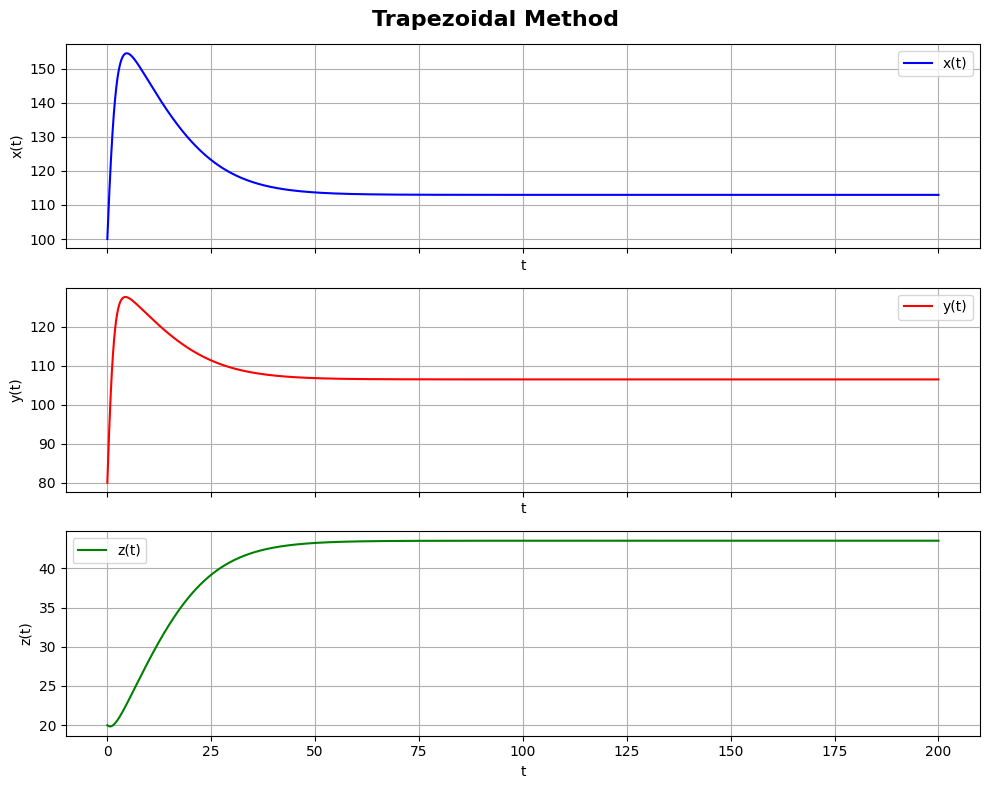

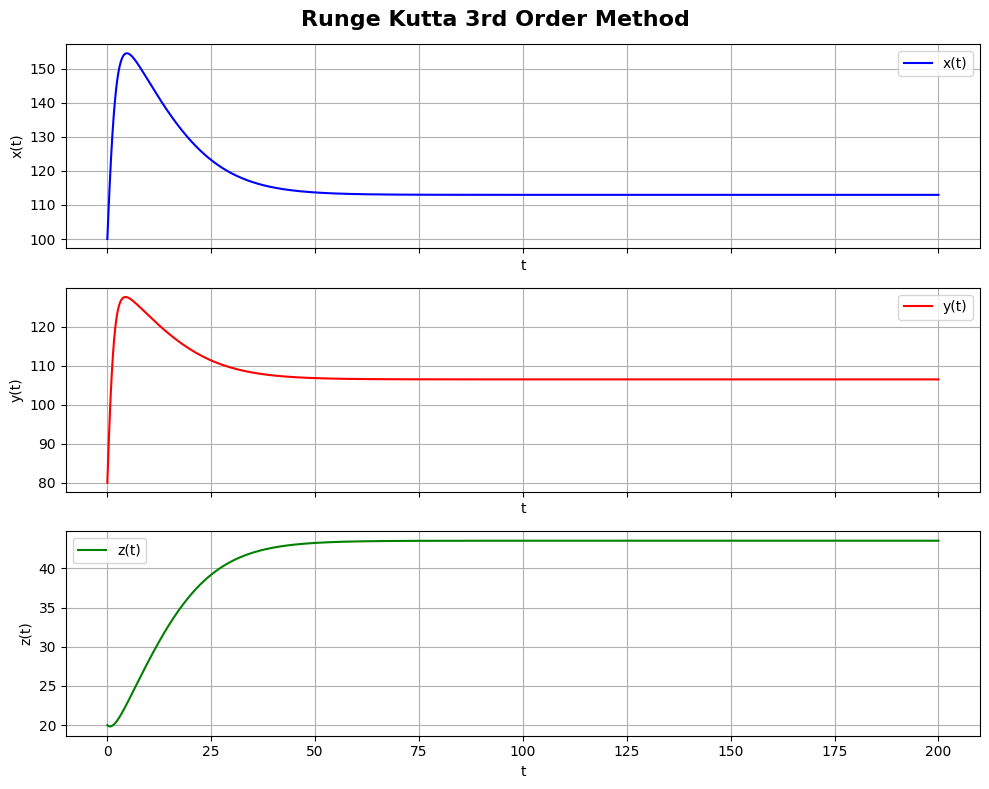

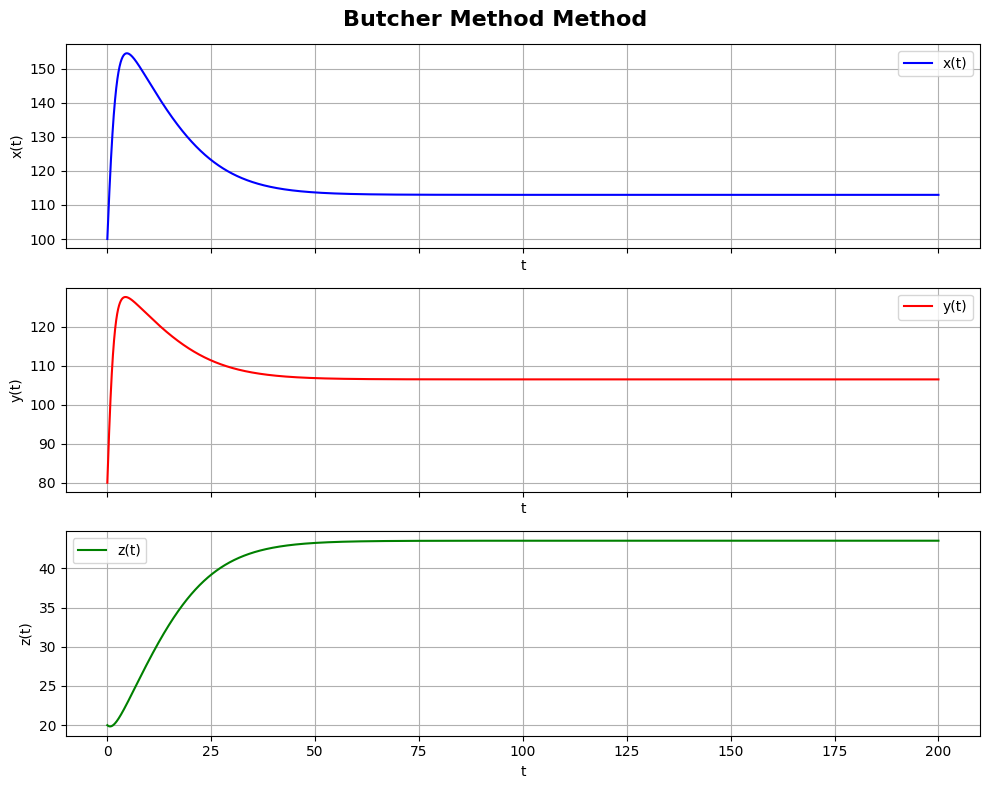

In [32]:
# calling the functions
t_array,trpz,rk3,butcher=integrate_methods(f_ode,trapz_method,rk3_method,Butcher_rk_method,parameters)
plot_methods(t_array,trpz,rk3,butcher)


## 2. Dynamical systems and equilibrium (5 points)

### Python class:

**(a)** Reorganise all your code from problem 1 into a single python class that contains attributes and methods. The settings and initial conditions should be attributes and all the python functions should become methods. Add a method to compute $L_2$-norm errors.

In [43]:
# create a class    
class SolvingODEs:
    
    #
    def __init__(self,initial_conditions,parameters,stepsize):
        self.initial_conditions=initial_conditions
        self.parameters=parameters
        self.stepsize=stepsize

    #
    def f_ode(self,t,S):
        x,y,z=S
        # slope function 
        F_slope=np.array([[self.parameters['g1'] * (1-x/self.parameters['c1']), 0 , -self.parameters['p1'] * x]\
                          ,[0, self.parameters['g2'] *(1-y/self.parameters['c2']),-self.parameters['p2'] * y ]\
                            ,[self.parameters['e1'] * self.parameters['p1'] * z, self.parameters['e2'] * self.parameters['p2']  * z,-self.parameters['d']]])
        return F_slope @ S

    #   
    def trapz_method(self,t):
        S0=self.initial_conditions
        h=self.parameters['dt'][self.stepsize]
        S = np.zeros((len(t), 3), dtype=float)
        # Set initial condition
        S[0] = S0

        # integration
        for j in range(0,len(t)-1):
            x,y,z=S[j]
            m_left=np.array([[-h/2 * self.parameters['g1']*(1-x/self.parameters['c1'])+1, 0 , h/2 * self.parameters['p1'] * x]\
                             ,[0, -h/2 * self.parameters['g2'] * (1-y/self.parameters['c2'])+1, h/2 * self.parameters['p2'] *y]\
                             , [-h/2 * self.parameters['e1'] * self.parameters['p1'] * z, -h/2 * self.parameters['e2'] * self.parameters['p2'] * z ,h/2*self.parameters['d'] +1]])
            m_right=np.array([[h/2 * self.parameters['g1']*(1-x/self.parameters['c1'])+1, 0 , -h/2 * self.parameters['p1'] * x]\
                              ,[0, h/2 * self.parameters['g2'] * (1-y/self.parameters['c2'])+1, -h/2 * self.parameters['p2'] *y]\
                              , [h/2 * self.parameters['e1'] * self.parameters['p1'] * z, h/2 * self.parameters['e2'] * self.parameters['p2'] * z ,-h/2*self.parameters['d'] +1]])
            righ_s=m_right@S[j]
            Sj1=np.linalg.solve(m_left,righ_s)
            S[j+1,:]=Sj1
        return S


    def rk3_method(self,t):
        S=np.zeros((len(t),3))
        S[0]=self.initial_conditions
    
        for j in range (0,len(t)-1):
            h=t[j+1]-t[j] 
            k1=self.f_ode(t[j],S[j])
            k2=self.f_ode(t[j]+h/2 , S[j] + h/2 *k1)
            k3=self.f_ode(t[j]+h , S[j] - h*k1 +  2*h* k2)
            S[j+1,:]=S[j] + h*(1/6 *k1 +2/3 * k2 + 1/6 *k3 )
        return S
    
    # 
    def Butcher_rk_method(self,t):
        """"A
    
    
        """
        S=np.zeros((len(t),3))
    # set the initial conditions
        S[0]=self.initial_conditions

        # integration 
        for j in range(0, len(t)-1):

            # define the time step
            h=t[j+1]-t[j]
            # ks
            k1=self.f_ode(t[j],S[j])
            k2=self.f_ode(t[j] + h/4,S[j] +1/4 * k1*h)
            k3=self.f_ode(t[j] + h/4, S[j] + 1/8 * k1*h + 1/8 *k2*h)
            k4=self.f_ode(t[j] + h/2, S[j] - 1/2 * k2*h + k3*h)
            k5=self.f_ode(t[j] + 3*h/4, S[j] + 3/16 * k1*h + 9/16 * k4*h)
            k6=self.f_ode(t[j] + h, S[j] - 3/7 * k1*h + 2/7 * k2*h + 12/7 * k3*h - 12/7 * k4*h + 8/7 * k5*h)

            # solution 
            S[j+1,:]=S[j] + h/90 * (7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6)
        return S
    #
    
    #
    def integrate_methods(self):
        t_array=np.arange(self.parameters['t_span'][0],self.parameters['t_span'][1]+self.parameters['dt'][self.stepsize],self.parameters['dt'][self.stepsize])
        trpz=self.trapz_method(t_array)
        rk3=self.rk3_method(t_array)
        butcher=self.Butcher_rk_method(t_array)
        return t_array,trpz,rk3,butcher
    
    def plot_methods(self):
        t_array,trpz,rk3,butcher=self.integrate_methods()
        methods=[("Trapezoidal",trpz),("Runge Kutta 3rd Order",rk3),("Butcher Method",butcher)]
        colors=['b','r','g'] 
        for method_name, method_snls in methods:
            fig, ax = plt.subplots(3,1,figsize=(10,8), sharex=True)
            fig.suptitle(f'{method_name} Method', fontsize=16,fontweight='bold')

            #subplot for x(t) solution
            ax[0].plot(t_array, method_snls[:,0], color=colors[0], linestyle='-', label='x(t)')
            ax[0].set_xlabel('t')
            ax[0].set_ylabel('x(t)')
            ax[0].legend()
            ax[0].grid()

            #subplot for y(t) solution
            ax[1].plot(t_array, method_snls[:,1], color=colors[1], linestyle='-', label='y(t)')
            ax[1].set_xlabel('t')
            ax[1].set_ylabel('y(t)')    
            ax[1].legend()      
            ax[1].grid()

            #subplot for z(t) solution
            ax[2].plot(t_array, method_snls[:,2], color=colors[2], linestyle='-', label='z(t)')
            ax[2].set_xlabel('t')
            ax[2].set_ylabel('z(t)')
            ax[2].legend()
            ax[2].grid()    

            plt.tight_layout()
            plt.show()
        return  
    #compute the exact solution of the system of ODES using solve_ivp
    def exact_solution(self):
        t_array=np.arange(self.parameters['t_span'][0],self.parameters['t_span'][1]+self.parameters['dt'][self.stepsize],self.parameters['dt'][self.stepsize])
        sol=solve_ivp(self.f_ode,self.parameters['t_span'],self.initial_conditions,t_eval=t_array, method='RK45',rtol=1e-10,atol=1e-12)
        return sol.y.T
    #

    def computeL2Norm(self):
        ext_sol=self.exact_solution()
        t_array,trpz,rk3,butcher=self.integrate_methods()
        L2_norm_trpz=np.sqrt(np.sum((trpz-ext_sol)**2))
        L2_norm_rk3=np.sqrt(np.sum((rk3-ext_sol)**2))
        L2_norm_butcher=np.sqrt(np.sum((butcher-ext_sol)**2))
        return L2_norm_trpz,L2_norm_rk3,L2_norm_butcher
        


In [44]:
vecto1=np.array([1,2,3,4,5,6,7,8])
vecto2=np.array([4,3,2,5,6,7,8,1])
print((vecto1-vecto2)**2)

[ 9  1  1  1  1  1  1 49]



### Error analysis:

**(b)** Call the methods from your python class above to run $15$ simulations ($5$ simulations per integration method) for $5$ decreasing values of the time step size, `dt` (i.e. $h$). Then, compute the $L_2$-norm errors for all these $15$ runs and report the results in a single figure with the $L_2$-norm errors in the Y axis and $h$ in the X axis. Which method produces the most accurate results?


In [52]:
# set the initial conditions
initial_conditions=np.array([parameters['x0'],parameters['y0'],parameters['z0']])
#Create a second dictorionary (copy of the parameters dictionary) including the 5 decreasing values of the time step dt (h)

parameters1={'g1':1.0,'c1':200.0, 'p1': 0.01, 'g2': 1.2, 'c2': 150.0, 'p2': 0.008, 'e1': 0.08,\
             'e2': 0.07, 'd': 0.15, 'x0': 100.0, 'y0': 80.0, 'z0': 20.0, 't_span': (0,200), 'dt': [0.2, 0.1, 0.01, 0.001,0.0001], 'method': ['RK3','Trapezoidal','Butcher']}
# call the function to get the solutions with their respective L2-norms errors

# call the method for the frst stepsize h=0.1
ode_solver0=SolvingODEs(initial_conditions,parameters1,0)
t_array0,trpz0,rk30,butcher0=ode_solver0.integrate_methods()
L2_norm_trpz0,L2_norm_rk30,L2_norm_butcher0=ode_solver0.computeL2Norm()
#L2_norm_x_trpz0,L2_nomr_y_trpz0,L2_norm_z_trpz0,L2_norm_x_rk30,L2_nomr_y_rk30,L2_norm_z_rk30,L2_norm_x_butcher0,L2_nomr_y_butcher0,L2_norm_z_butcher0=ode_solver0.computeL2Norm()  


#call the method for the second stepsize h=0.01
ode_solver1=SolvingODEs(initial_conditions,parameters1,1)
t_array1,trpz1,rk31,butcher1=ode_solver1.integrate_methods()
L2_norm_trpz1,L2_norm_rk31,L2_norm_butcher1=ode_solver1.computeL2Norm()
#L2_norm_x_trpz1,L2_nomr_y_trpz1,L2_norm_z_trpz1,L2_norm_x_rk31,L2_nomr_y_rk31,L2_norm_z_rk31,L2_norm_x_butcher1,L2_nomr_y_butcher1,L2_norm_z_butcher1=ode_solver1.computeL2Norm()
#call the method for the third stepsize h=0.001
ode_solver2=SolvingODEs(initial_conditions,parameters1,0)
t_array2,trpz2,rk32,butcher2=ode_solver2.integrate_methods()
L2_norm_trpz2,L2_norm_rk32,L2_norm_butcher2=ode_solver2.computeL2Norm()
#L2_norm_x_trpz2,L2_nomr_y_trpz2,L2_norm_z_trpz2,L2_norm_x_rk32,L2_nomr_y_rk32,L2_norm_z_rk32,L2_norm_x_butcher2,L2_nomr_y_butcher2,L2_norm_z_butcher2=ode_solver2.computeL2Norm()
#call the method for the fourth stepsize h=0.0001
ode_solver3=SolvingODEs(initial_conditions,parameters1,0)
t_array3,trpz3,rk33,butcher3=ode_solver3.integrate_methods()
L2_norm_trpz3,L2_norm_rk33,L2_norm_butcher3=ode_solver3.computeL2Norm()
#L2_norm_x_trpz3,L2_nomr_y_trpz3,L2_norm_z_trpz3,L2_norm_x_rk33,L2_nomr_y_rk33,L2_norm_z_rk33,L2_norm_x_butcher3,L2_nomr_y_butcher3,L2_norm_z_butcher3=ode_solver3.computeL2Norm()
#call   the method for the fifth stepsize h=0.00001
ode_solver4=SolvingODEs(initial_conditions,parameters1,0)
t_array4,trpz4,rk34,butcher4=ode_solver4.integrate_methods()
L2_norm_trpz4,L2_norm_rk34,L2_norm_butcher4=ode_solver4.computeL2Norm()
#L2_norm_x_trpz4,L2_nomr_y_trpz4,L2_norm_z_trpz4,L2_norm_x_rk34,L2_nomr_y_rk34,L2_norm_z_rk34,L2_norm_x_butcher4,L2_nomr_y_butcher4,L2_norm_z_butcher4=ode_solver4.computeL2Norm()



Text(0.5, 1.0, 'L2 Norm Error vs Stepsize h')

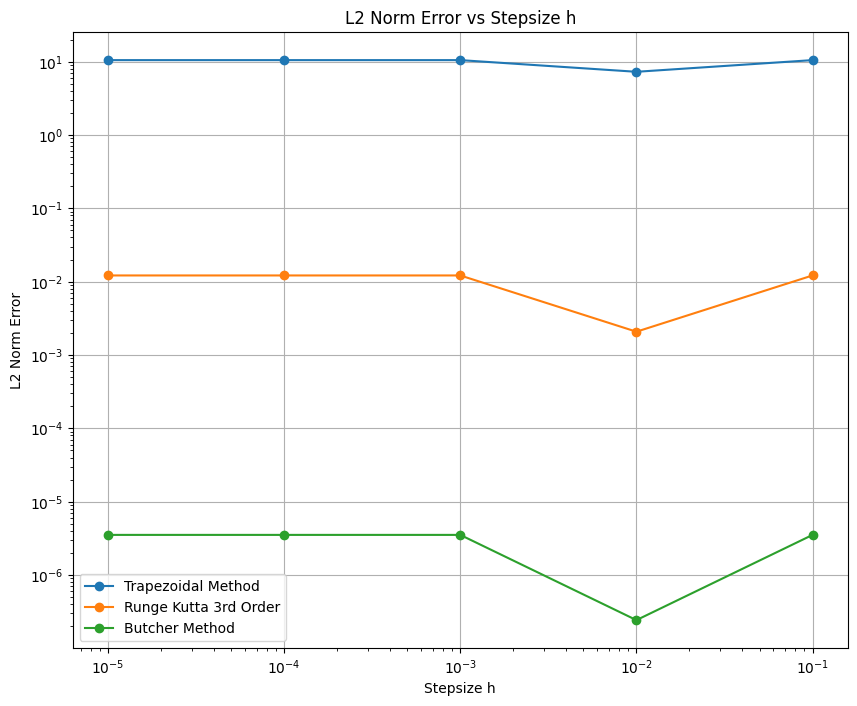

In [53]:
plt.figure(figsize=(10,8))
plt.loglog([0.1, 0.01, 0.001, 1e-4,1e-5],[L2_norm_trpz0,L2_norm_trpz1,L2_norm_trpz2,L2_norm_trpz3,L2_norm_trpz4],'o-',label='Trapezoidal Method')
plt.loglog([0.1, 0.01, 0.001, 1e-4,1e-5],[L2_norm_rk30,L2_norm_rk31,L2_norm_rk32,L2_norm_rk33,L2_norm_rk34],'o-',label='Runge Kutta 3rd Order')
plt.loglog([0.1, 0.01, 0.001, 1e-4,1e-5],[L2_norm_butcher0,L2_norm_butcher1,L2_norm_butcher2,L2_norm_butcher3,L2_norm_butcher4],'o-',label='Butcher Method')
plt.xlabel('Stepsize h')
plt.ylabel('L2 Norm Error') 
plt.legend()
plt.grid()
plt.title('L2 Norm Error vs Stepsize h')    

As we can see in the graph, the most accurate method in the Butcher Method, it has the smallest L2 error for most step sizes. The error in RK3 and Butcher Methods decreases for values around $10^2$, but, they are unstable with excessively large step sizes and lose precesion with small steps. The trapezoidal method is the less accurate, it has hig L2 errors. 

### Equilibrium conditions:

**(c)** Write down the equilibrium condition for the system, $S(t)$. Then, create a python function that uses sympy to study the equilibrium populations of $x$, $y$, and $z$ for a range of values of the natural death rate of the predator, $d$. The function should accept a range of $d$ values and return the equilibrium populations for all the $d$ values in the range. Ensure that the solutions are filtered to exclude extinction cases.


### Equilibrium Conditions

$$
\frac{dx}{dy} = g_1 x (1-\frac{x}{c_1}) - p_1 x z = 0,
$$
$$
\frac{dx}{dy} = g_2 y (1-\frac{y}{c_2}) - p_2 y z = 0,
$$

$$
\frac{dz}{dt} = e_1 p_1 x z + e_2 p_2 y z -d z  = 0
$$


In [81]:
def equilibrium_condition(param,d_values) :
    '''
    
    '''
    g1=param['g1']
    c1=param['c1']
    p1=param['p1']
    g2=param['g2']
    c2=param['c2']
    p2=param['p2']
    e1=param['e1']
    e2=param['e2']
    d=d_values
    x,y,z = sp.symbols('x,y,z')
    # define the equilibrium condition
    eq1=g1*x*(1-x/c1)-p1*x*y-e1*p1*x*z
    eq2=g2*y*(1-y/c2)-p2*y*z-e2*p2*y*z
    eq3=e1*p1*x*z+e2*p2*y*z-d*z


    # solve the equilibrium condition
    sol_equi=np.array(sp.solve([eq1,eq2,eq3],[x,y,z],dic=True))

    # separate valid solutions (postivive real values, and nonzero)
    sol_final=np.zeros((len(sol_equi),3))
    for i in range(len(sol_equi)):
        for j in range(3):
            if sol_equi[i][j]<=0:
                sol_final=np.delete(sol_final,i,axis=0)
                pass
            else:
                sol_final[i][j]=sol_equi[i][j]
                
    return sol_final

In [82]:
sol_equi=equilibrium_condition(parameters, parameters['d'])
print(sol_equi)
print(len(sol_equi))

IndexError: index 2 is out of bounds for axis 0 with size 2




**(d)** After computing equilibrium solutions for multiple values of the predator mortality $d$, you should create a high-quality figure of the equilibrium populations of $x$, $y$, and $z$ (on the Y axis) versus $d$ (on the x-axis), and label what happens in the parameter regions outside of equilibrium conditions.

**(e)** Based on your analysis, for what range of $d$ values the system reaches equilibrium? What happens outside of that range? Call your class again to run and compare equilibrium versus extinction scenarios using $3$ different values of $d$.


## 3. Quantum Harmonic Oscillator (7 points)

The Schrödinger equation for the quantum harmonic oscillator is:

$$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+\frac{1}{2}m\omega^2x^2\psi=E\psi$$

It can be rewritten, in terms of a new variable, $\xi\equiv\sqrt{\frac{m\,\omega}{\hbar}}x$, as follows:

$$\frac{d^2\psi}{d\xi^2}=\left(\xi^2 -K\right)\psi$$

where $K\equiv\frac{2E}{\hbar\omega}$ is the energy in units of $\frac{1}{2}\hbar\omega$.

### Order reduction and slope function:

**(a)** Reduce the above ODE to first order. Write down the resulting slope function.



### Shooting method class:

**(b)** Carefully read the tasks (c-g) below and design a suitable python class with attributes and methods that solves the above ODE using **the shooting method** with the slope computed in (a). You may use scipy integrators; there is no need to design your own integrators in this problem.

In [2]:
import scipy.optimize as opt

In [69]:
# Le'ts first try to create the fucntions that compute the shooting method
# define the slope function
#slope_F=lambda e,s: np.dot(np.array([[0,1],[e**2-1,0]]),s)
def slope_F(e,s):
    ''''
    
    '''

    return np.array([[0,1],[e**2-1,0]])@s
def shooting_method(psi_p):
    '''
    
    '''
    t_eval=np.linspace(0,6,100)
    solve=solve_ivp(slope_F,[0,6],np.asarray([0,psi_p],dtype=object),t_eval=t_eval)
    sol=solve.y[0]
    return sol[-1]-0.7
    
# energy guess
psi_p_guess=0
# call the function 
shot_sol=opt.fsolve(shooting_method,psi_p_guess)


In [80]:
print(shot_sol)

[1.29931281e-07]


In [74]:
t_ax=np.linspace(0,6,100)

In [82]:
sol_psi=solve_ivp(slope_F,[0,6],np.asarray([0,shot_sol],dtype=object),t_eval=t_ax)
print(sol_psi.y.shape)

(2, 100)


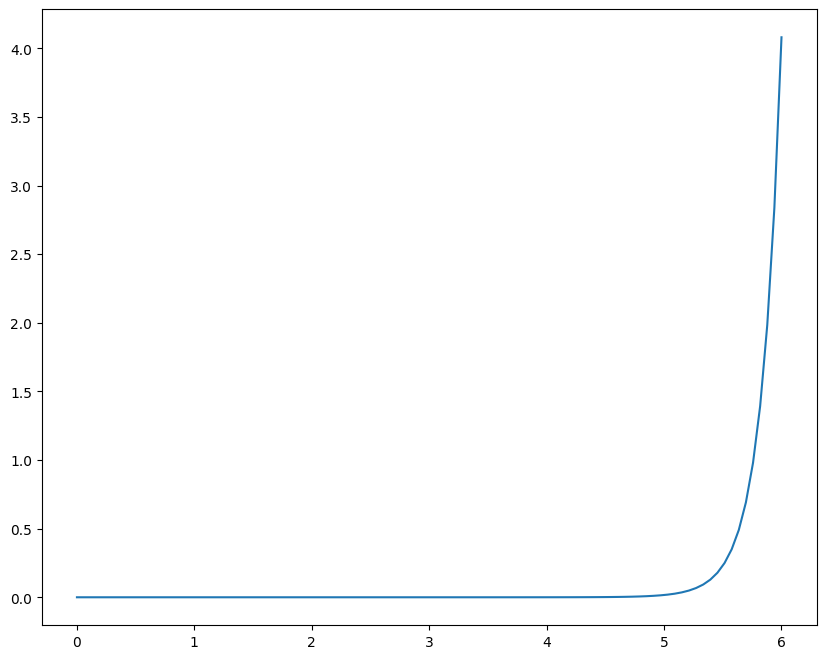

In [77]:
plt.figure(figsize=(10,8))
plt.plot(t_ax, sol_psi.y[1])
plt.show()


### Tasks to be performed by your python class:

**(c)** Find the **ground state energy** of the harmonic oscillator, to six significant digits, by using **the shooting method**. That is, solve the above equation numerically, varying $K$ until you get a wave function that goes to zero at large $\xi$. The appropriate boundary conditions for the ground state (and any even state) are $\psi(0) = 1$, $\psi'(0) = 0$.




**(d)** Make a few illustrative panels showing plots of the wave function for different values of $K$ as it converges to the solution. What does the tail of the wave function does when the values are slightly above or below the correct solution?

**(e)** Find the **first four excited state energies** (to six significant digits) for the harmonic oscillator, using **the shooting method**. For the first (and third) excited state you will need to set $\psi(0) = 0$, $\psi'(0) = 1$).

**(f)** Make a few illustrative panels showing plots of the wave functions for different values of $K$ as they converge to their respective solutions.

**(g)** Make a single plot showing the **harmonic potential** joinly with the **energy ladder** of the quantum harmonic oscillator (include the ground state plus the first four excited states that you calculated above, each with their **respective wave functions**). Consider the particle to be an electron and choose appropriate units for any physical parameters you may need.